In [26]:
# basic import statements
import os
import re
import gc
import warnings
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from datetime import date 

#set max display in notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Show multiple output in console
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [27]:
df = pd.read_csv('2021_Data.csv')
df.shape
df.head()

(6604971, 17)

,SKU,CONDITION,SIZE,GENDER,SOLD_AT,SOLD_PRICE,SOURCE,SIZE_VALUE,BRAND,NAME,COLORWAY,COLOR,SILHOUETTE,RETAILPRICE,RELEASEDATE,IS_COLLAB,COLLABORATOR
0,CD4385-800,is_new,10.5,men,2021-01-10T05:49:58.793Z,240.0,alias,10.5,Nike,Nike Air Zoom Victory Bright Mango,Bright Mango/Purple Pulse/Black/Blackened Blue,orange,Zoom Victory,180.0,2020-12-06,False,NaN
1,DD1399-101,is_new,7.5,men,2021-12-13T14:37:24Z,236.0,stockx,7.5,Nike,Nike Dunk High Syracuse (2021),White/Orange Blaze,white,Dunk,110.0,2021-03-10,False,NaN
2,BQ7666-100,is_new,10,men,2021-07-12T07:12:01Z,169.0,stockx,10.0,Jordan,Jordan 8 SP Retro SE White Multicolor,White/Black-Red Orbit,white,Air Jordan 8,225.0,2019-09-18,False,NaN
3,CK7214-100,is_new,11.5,men,2021-08-02T06:35:16Z,140.0,stockx,11.5,Nike,Nike Air Force 1 Low '07 LV8 White,White/White/White,white,Air Force 1,110.0,2020-07-20,False,NaN
4,BQ6806-115,is_new,7,men,2021-06-21T20:46:04Z,123.0,stockx,7.0,Nike,Nike Blazer Mid 77 Vintage Pine Green,White/Pine Green,white,Blazer,100.0,2021-01-22,False,NaN


In [3]:
for col in df.columns:
    print(col)

SKU
CONDITION
SIZE
GENDER
SOLD_AT
SOLD_PRICE
SOURCE
SIZE_VALUE
BRAND
NAME
COLORWAY
COLOR
SILHOUETTE
RETAILPRICE
RELEASEDATE
IS_COLLAB
COLLABORATOR


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6604971 entries, 0 to 6604970
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   SKU           object 
 1   CONDITION     object 
 2   SIZE          object 
 3   GENDER        object 
 4   SOLD_AT       object 
 5   SOLD_PRICE    float64
 6   SOURCE        object 
 7   SIZE_VALUE    float64
 8   BRAND         object 
 9   NAME          object 
 10  COLORWAY      object 
 11  COLOR         object 
 12  SILHOUETTE    object 
 13  RETAILPRICE   float64
 14  RELEASEDATE   object 
 15  IS_COLLAB     object 
 16  COLLABORATOR  object 
dtypes: float64(3), object(14)
memory usage: 856.7+ MB


In [5]:
# Convert 'RELEASE_DATE' column to datetime format
df['SOLD_AT'] = pd.to_datetime(df['SOLD_AT'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
df['RELEASEDATE'] = pd.to_datetime(df['RELEASEDATE'])

In [6]:
df.describe()

,SOLD_AT,SOLD_PRICE,SIZE_VALUE,RETAILPRICE,RELEASEDATE
count,5892914,6.604971e+06,6.571902e+06,6.554707e+06,6431518
mean,2021-08-06 22:43:21.573876480,2.412811e+02,9.110462e+00,1.486741e+02,2020-06-07 10:00:00.306738432
min,2021-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1975-01-01 00:00:00
25%,2021-05-23 06:03:35,1.300000e+02,7.500000e+00,1.100000e+02,2020-01-18 00:00:00
50%,2021-08-19 13:26:38.500000,1.850000e+02,9.500000e+00,1.400000e+02,2021-01-02 00:00:00
75%,2021-11-02 18:41:40.500000,2.690000e+02,1.100000e+01,1.800000e+02,2021-06-22 00:00:00
max,2021-12-31 23:59:57,6.500000e+04,2.000000e+01,5.250000e+03,2023-12-16 00:00:00
std,NaN,3.022455e+02,2.481661e+00,7.589926e+01,NaN


In [7]:
# check the null values percentage 
(df.isnull().sum() / len(df)) * 100

SKU              0.561077
CONDITION        0.000000
SIZE             0.012354
GENDER           0.761003
SOLD_AT         10.780623
SOLD_PRICE       0.000000
SOURCE           0.000000
SIZE_VALUE       0.500668
BRAND            0.761003
NAME             0.761003
COLORWAY         0.806135
COLOR            0.806135
SILHOUETTE       0.762078
RETAILPRICE      0.761003
RELEASEDATE      2.626098
IS_COLLAB        0.761048
COLLABORATOR    84.750955
dtype: float64

## EDA

In [8]:
# brand analysis
brand_counts = df['BRAND'].value_counts()
brand_counts

BRAND
Nike                 2835478
Jordan               2194531
adidas                952660
New Balance           199275
Converse              140545
Reebok                 54529
Vans                   43146
Puma                   31093
ASICS                  23985
Crocs                  23605
Balenciaga              8440
Gucci                   8252
Under Armour            7946
BAPE                    5829
OFF-WHITE               5545
Alexander McQueen       4497
Saucony                 2942
Off-White               2536
Dior                    2282
Louis Vuitton           1421
Common Projects         1156
Diadora                  882
Burberry                 740
Versace                  739
Fila                     462
Hoka One One             413
Li-Ning                  358
Yeezy                    334
Fear of God              329
Prada                    280
Salomon                  212
Chanel                   161
Saint Laurent             80
Bait                      20
ON      

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='BRAND', ylabel='count'>

Text(0.5, 1.0, 'Count of Sneakers by Brand')

Text(0.5, 0, 'Brand')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Nike'),
  Text(1, 0, 'Jordan'),
  Text(2, 0, 'adidas'),
  Text(3, 0, 'Diadora'),
  Text(4, 0, 'Reebok'),
  Text(5, 0, 'Vans'),
  Text(6, 0, 'New Balance'),
  Text(7, 0, 'Balenciaga'),
  Text(8, 0, 'Converse'),
  Text(9, 0, 'Puma'),
  Text(10, 0, 'ASICS'),
  Text(11, 0, 'OFF-WHITE'),
  Text(12, 0, 'BAPE'),
  Text(13, 0, 'Gucci'),
  Text(14, 0, 'Under Armour'),
  Text(15, 0, 'Crocs'),
  Text(16, 0, 'Dior'),
  Text(17, 0, 'Alexander McQueen'),
  Text(18, 0, 'Salomon'),
  Text(19, 0, 'Versace'),
  Text(20, 0, 'Fila'),
  Text(21, 0, 'Saucony'),
  Text(22, 0, 'Louis Vuitton'),
  Text(23, 0, 'Off-White'),
  Text(24, 0, 'Burberry'),
  Text(25, 0, 'Fear of God'),
  Text(26, 0, 'Common Projects'),
  Text(27, 0, 'Prada'),
  Text(28, 0, 'Hoka One One'),
  Text(29, 0, 'Yeezy'),
  Text(30, 0, 'Chanel'),
  Text(31, 0, 'Li-N

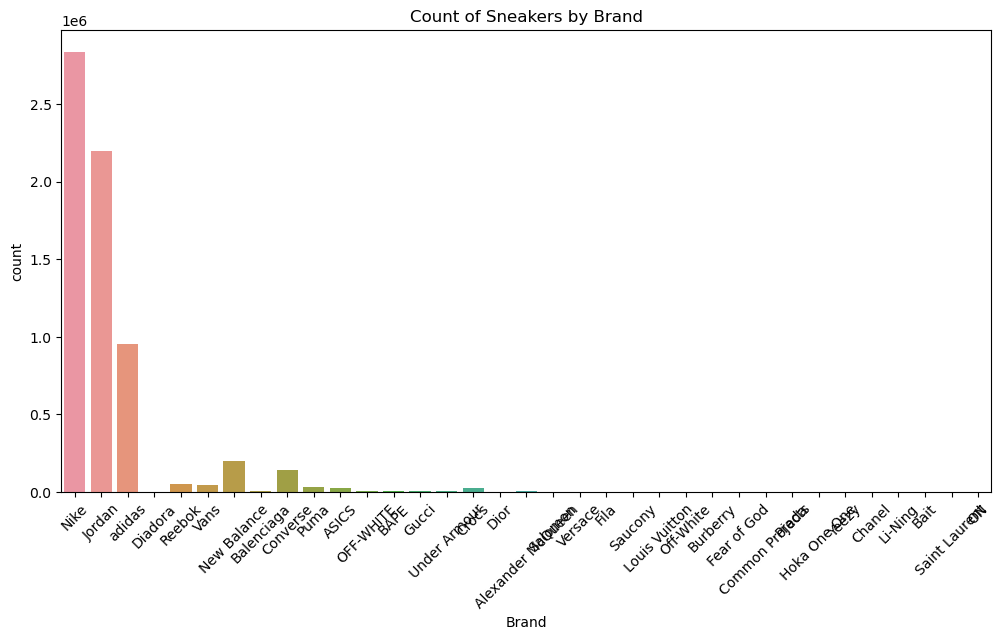

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Top Brands')
plt.xlabel('Brand')
plt.ylabel('Count')

NAME
Nike Air Force 1 Low '07 White                                    25172
Nike Air Force 1 Low Supreme White                                24588
Nike Air Max 1 Patta Waves Monarch (with Bracelet)                18736
Jordan 4 Retro Lightning (2021)                                   17283
Nike Dunk Low Retro White Black Panda                             17273
                                                                  ...  
Board Flip                                                            1
Playstation x Air Force 1 Low Promo                                   1
Fresh Foam 880v11 2E Wide 'Black Cyclone'                             1
Converse Chuck Taylor All-Star Hi DC Comics Superman (Women's)        1
Vivienne Westwood x Sk8-Hi Platform 'Anglomania'                      1
Name: count, Length: 51801, dtype: int64

<Axes: >

<Axes: xlabel='NAME'>

Text(0.5, 1.0, 'Top Models')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Count')

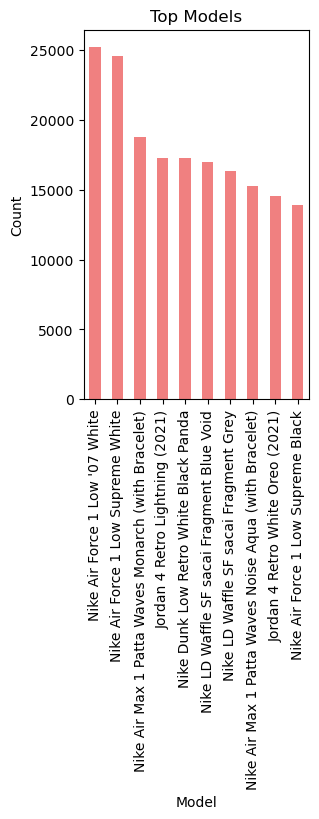

In [10]:
# model
model_counts = df['NAME'].value_counts()
model_counts

#Fig
plt.subplot(1, 2, 2)
model_counts.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top Models')
plt.xlabel('Model')
plt.ylabel('Count')

IS_COLLAB
False    217.685353
True     356.918521
Name: SOLD_PRICE, dtype: float64

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='IS_COLLAB'>

Text(0.5, 1.0, 'Average Resale Price by Collaboration')

Text(0.5, 0, 'Collaboration')

Text(0, 0.5, 'Average Resale Price')

([<matplotlib.axis.XTick at 0x11cc993d0>,
 [Text(0, 0, 'Not a Collab'), Text(1, 0, 'Collab')])

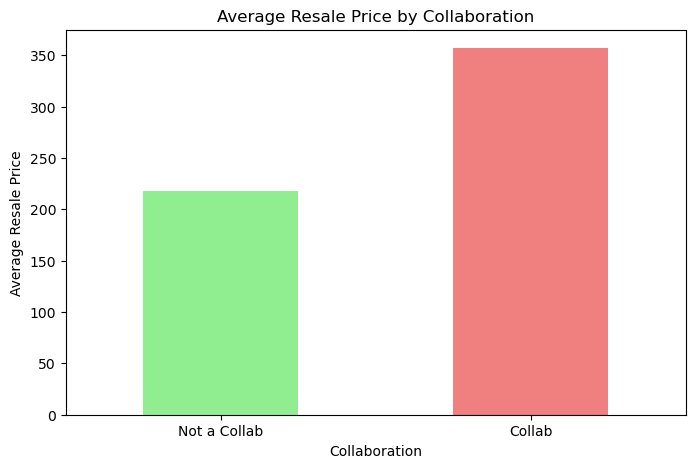

In [11]:
# collab vs sold price 
collab_prices = df.groupby('IS_COLLAB')['SOLD_PRICE'].mean()
collab_prices

#Fig
plt.figure(figsize=(8, 5))
collab_prices.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Average Resale Price by Collaboration')
plt.xlabel('Collaboration')
plt.ylabel('Average Resale Price')
plt.xticks([0, 1], ['Not a Collab', 'Collab'], rotation=0)
plt.show()

SOURCE
stockx     5890819
alias       633504
grailed      79282
ebay          1366
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='SOURCE'>

Text(0.5, 1.0, 'Resale Performance on Different Platforms')

Text(0.5, 0, 'Platform')

Text(0, 0.5, 'Number of Sales')

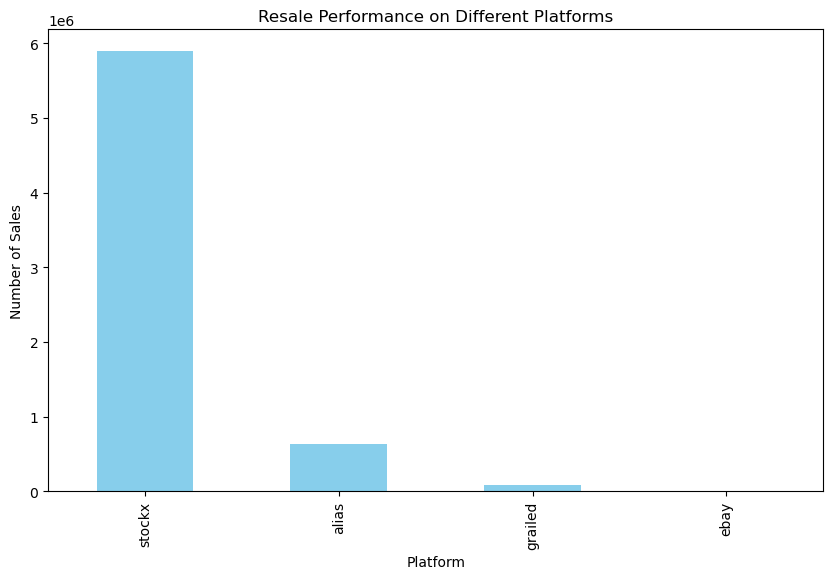

In [12]:
# platform Data Analysis
platform_counts = df['SOURCE'].value_counts()
platform_counts

# Fig
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Resale Performance on Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Sales')
plt.show()

COLOR
black         226.768822
blue          242.859675
brown         271.429624
cream         233.806699
green         232.264459
grey          275.926416
metallic      233.328017
multicolor    433.084390
orange        226.763331
pink          199.298399
purple        199.770385
red           218.022000
tan           271.609924
white         245.180491
yellow        249.255928
Name: SOLD_PRICE, dtype: float64

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: xlabel='COLOR'>

Text(0.5, 1.0, 'Average Resale Price by Color')

Text(0.5, 0, 'Color')

Text(0, 0.5, 'Average Resale Price')

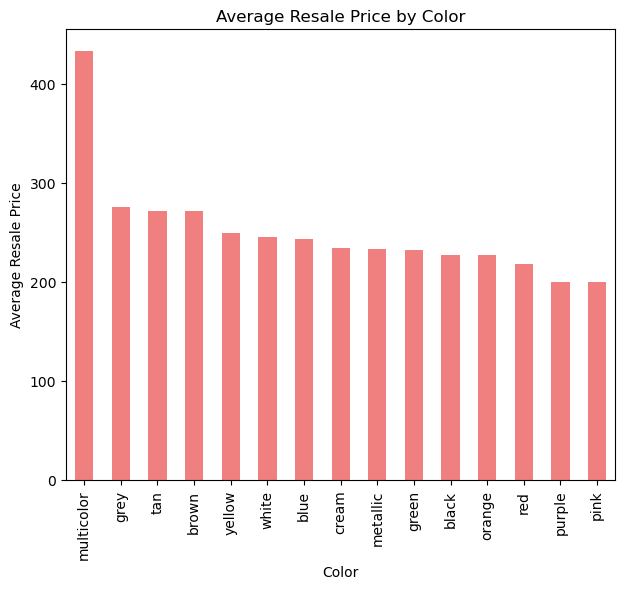

In [14]:
# color 
color_prices = df.groupby('COLOR')['SOLD_PRICE'].mean()
color_prices

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
color_prices.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Average Resale Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Resale Price')

plt.tight_layout()
plt.show()

In [16]:
# prices over time
df['SOLD_AT'] = pd.to_datetime(df['SOLD_AT'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='SOLD_AT', y='SOLD_PRICE', data=df)
plt.title('Resale Prices Over Time')
plt.xlabel('Sold Date')
plt.ylabel('Resale Price')
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Boxplot of Sold Prices')

Text(0.5, 0, 'Sold Price')

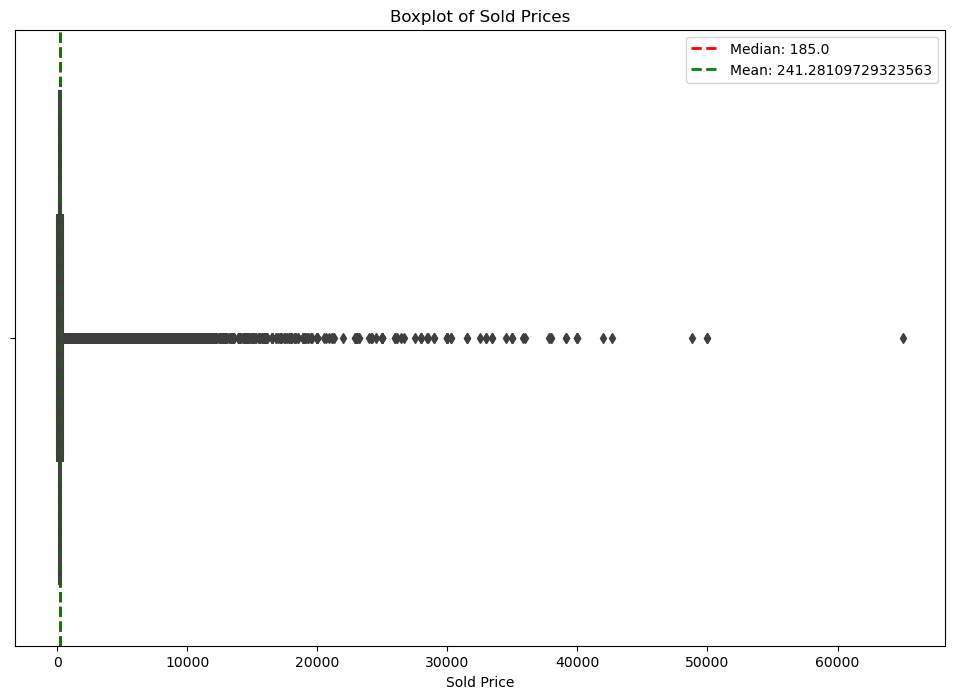

In [17]:
# Boxplot with additional information for 'SOLD_PRICE'
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['SOLD_PRICE'])
plt.title('Boxplot of Sold Prices')
plt.xlabel('Sold Price')

# Add statistical information
median = df['SOLD_PRICE'].median()
mean = df['SOLD_PRICE'].mean()
plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median}')
plt.axvline(mean, color='g', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')

plt.legend()
plt.show()

<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='BRAND', ylabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Boxplot of Sold Prices by Brand')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Sold Price')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Nike'),
  Text(1, 0, 'Jordan'),
  Text(2, 0, 'adidas'),
  Text(3, 0, 'Diadora'),
  Text(4, 0, 'Reebok'),
  Text(5, 0, 'Vans'),
  Text(6, 0, 'New Balance'),
  Text(7, 0, 'Balenciaga'),
  Text(8, 0, 'Converse'),
  Text(9, 0, 'Puma'),
  Text(10, 0, 'ASICS'),
  Text(11, 0, 'OFF-WHITE'),
  Text(12, 0, 'BAPE'),
  Text(13, 0, 'Gucci'),
  Text(14, 0, 'Under Armour'),
  Text(15, 0, 'Crocs'),
  Text(16, 0, 'Dior'),
  Text(17, 0, 'Alexander McQueen'),
  Text(18, 0, 'Salomon'),
  Text(19, 0, 'Versace'),
  Text(20, 0, 'Fila'),
  Text(21, 0, 'Saucony'),
  Text(22, 0, 'Louis Vuitton'),
  Text(23, 0, 'Off-White'),
  Text(24, 0, 'Burberry'),
  Text(25, 0, 'Fear of God'),
  Text(26, 0, 'Common Projects'),
  Text(27, 0, 'Prada'),
  Text(28, 0, 'Hoka One One'),
  Text(29, 0, 'Yeezy'),
  Text(30, 0, 'Chanel'),
  Text(31, 0, 'Li-N

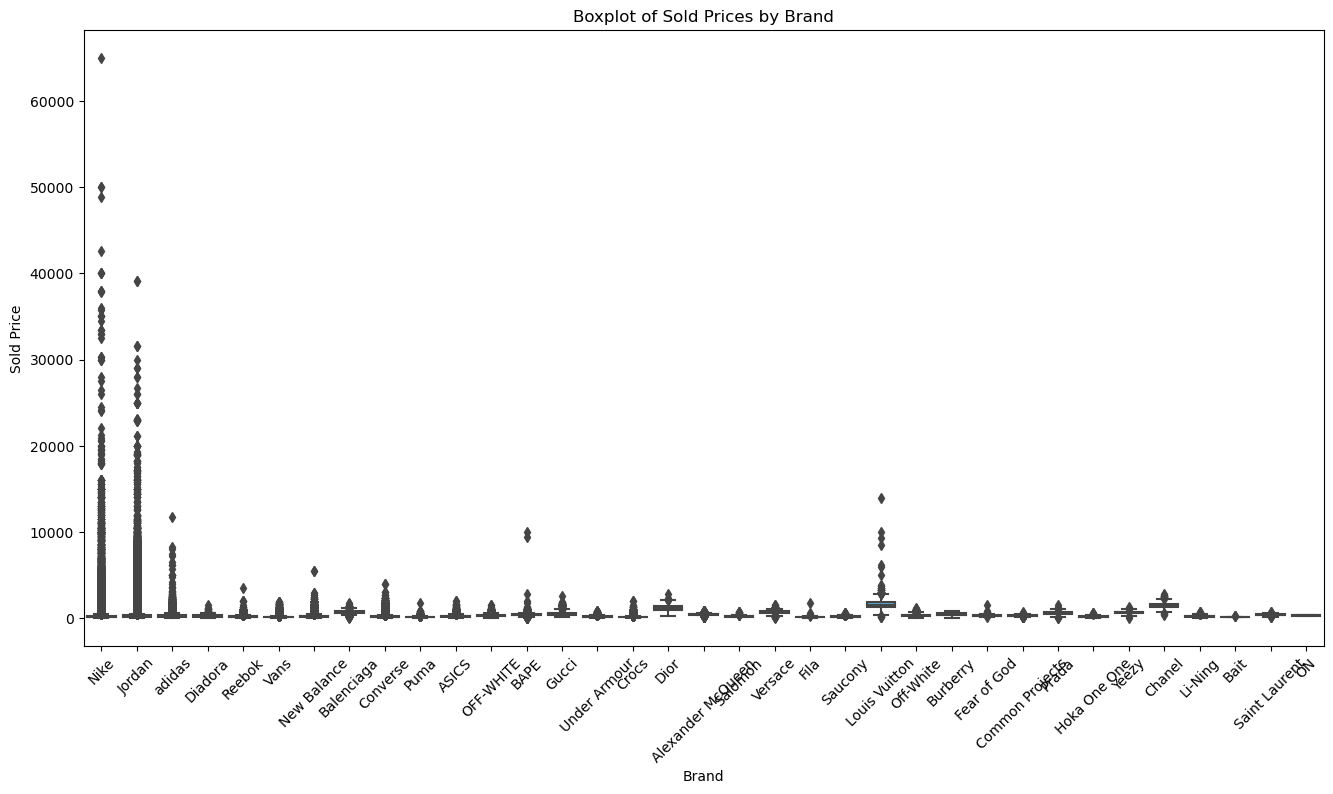

In [20]:
# Boxplot for 'BRAND' vs 'SOLD_PRICE'
plt.figure(figsize=(16, 8))
sns.boxplot(x='BRAND', y='SOLD_PRICE', data=df)
plt.title('Boxplot of Sold Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Sold Price')
plt.xticks(rotation=45)
plt.show()

<Figure size 1600x1200 with 0 Axes>

<Axes: >

<Axes: xlabel='CONDITION', ylabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Scatter Plot: SOLD_PRICE vs CONDITION')

<Axes: >

<Axes: xlabel='SIZE_VALUE', ylabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Scatter Plot: SOLD_PRICE vs SIZE_VALUE')

<Axes: >

<Axes: xlabel='GENDER', ylabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Scatter Plot: SOLD_PRICE vs GENDER')

<Axes: >

<Axes: xlabel='BRAND', ylabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Scatter Plot: SOLD_PRICE vs BRAND')

<Axes: >

<Axes: xlabel='COLOR', ylabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Scatter Plot: SOLD_PRICE vs COLOR')

<Axes: >

<Axes: xlabel='SILHOUETTE', ylabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Scatter Plot: SOLD_PRICE vs SILHOUETTE')

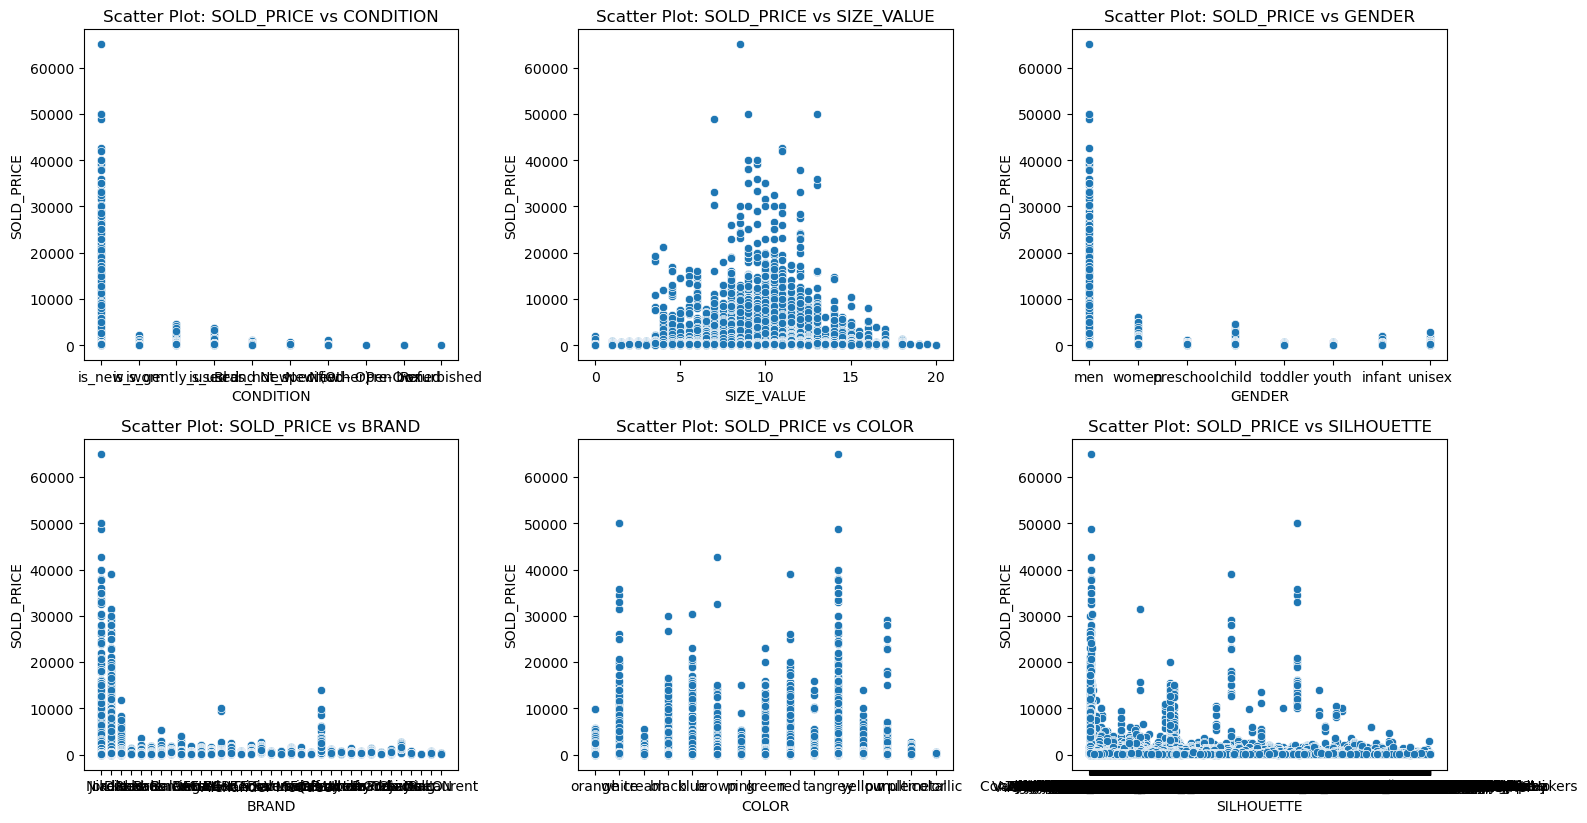

In [21]:
# Select relevant columns
df1 = df[['SOLD_PRICE', 'CONDITION', 'SIZE_VALUE', 'GENDER', 'BRAND', 'COLOR', 'SILHOUETTE']]

# Scatter plots for 'SOLD_PRICE' vs each independent variable
plt.figure(figsize=(16, 12))
for i, col in enumerate(['CONDITION', 'SIZE_VALUE', 'GENDER', 'BRAND', 'COLOR', 'SILHOUETTE']):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=col, y='SOLD_PRICE', data=df1)
    plt.title(f'Scatter Plot: SOLD_PRICE vs {col}')

plt.tight_layout()
plt.show()

In [22]:
df.CONDITION.value_counts()

CONDITION
is_new              6549120
is_gently_used        35098
is_used               17946
is_worn                1407
Brand New              1217
New (Other)             145
is_not_specified         34
Pre-Owned                 2
New – Open box            1
Refurbished               1
Name: count, dtype: int64

In [24]:
# Calculate the correlation coefficient
correlation_size_price = df['SIZE_VALUE'].corr(df['SOLD_PRICE'])
print(f"Correlation between SIZE_VALUE and SOLD_PRICE: {correlation_size_price}")

Correlation between SIZE_VALUE and SOLD_PRICE: 0.07479946570289027


##### Note:- as the correleation between sold_price and the size_value is 0.075, meaning there is a positive linear relationship, so if the size value increases there is a very slight chnace of the sold_price also increases, as the magnitude is very minute 0.075

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='SIZE_VALUE', ylabel='SOLD_PRICE'>

Text(0.5, 1.0, 'Scatter Plot: SOLD_PRICE vs SIZE_VALUE')

Text(0.5, 0, 'SIZE_VALUE')

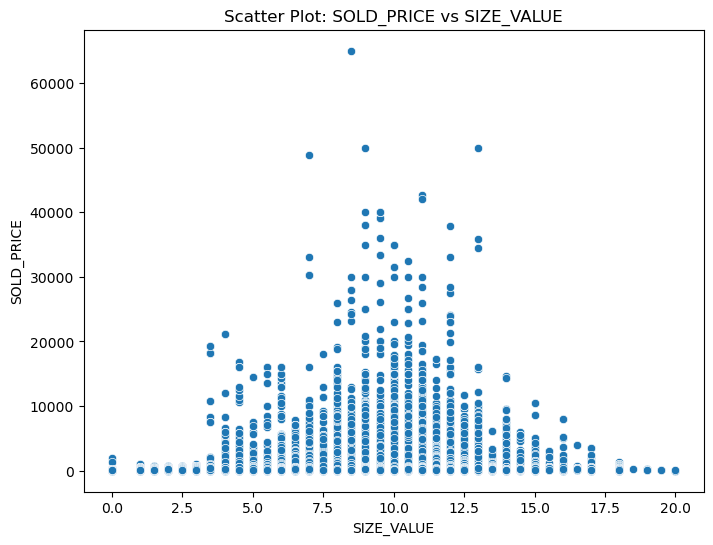

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SIZE_VALUE', y='SOLD_PRICE', data=df)
plt.title('Scatter Plot: SOLD_PRICE vs SIZE_VALUE')
plt.xlabel('SIZE_VALUE')
# plt.ylabel('SOLD_PRICE')
plt.show()

In [ ]:
# Calculate the correlation coefficient
correlation_size_price = df['BRAND'].corr(df['SOLD_PRICE'])
print(f"Correlation between SIZE_VALUE and SOLD_PRICE: {correlation_size_price}")

In [ ]:
df.head()